<a href="https://colab.research.google.com/github/lettuceburger/AI_Trials/blob/main/Net_Cash_Flow_Model_for_Banks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.6 MB/s eta 0:00:00


**Generating Syntheic Data**

In [22]:
import numpy as np
import pandas as pd
from faker import Faker
import random

# Initialize Faker for generating random data
fake = Faker()

# Define the number of data points
n = 10000  # You can increase this for larger datasets

# Define possible countries and currencies
countries = ['USA', 'UK', 'Germany', 'India', 'Japan']
currencies = ['USD', 'GBP', 'EUR', 'INR', 'JPY']

# Generate synthetic data
data = {
    'Date': pd.date_range(start='2022-01-01', periods=n, freq='D'),
    'Opening_Balance': np.random.uniform(50000, 1000000, size=n),
    'Customer_Deposits': np.random.uniform(10000, 500000, size=n),
    'Loan_Disbursments': np.random.uniform(5000, 200000, size=n),
    'Investment_Inflows': np.random.uniform(1000, 50000, size=n),
    'Interest_Income': np.random.uniform(1000, 20000, size=n),
    'Other_Income': np.random.uniform(500, 10000, size=n),
    'Loan_Repayments': np.random.uniform(10000, 250000, size=n),
    'Interest_Payments': np.random.uniform(500, 10000, size=n),
    'Operating_Expenses': np.random.uniform(1000, 50000, size=n),
    'Dividend_Payments': np.random.uniform(1000, 20000, size=n),
    'Investment_Outflows': np.random.uniform(5000, 150000, size=n),
    'Tax_Payments': np.random.uniform(1000, 50000, size=n),
    'Exchange_Rate': np.random.uniform(0.8, 1.5, size=n),  # Just an example range
    'Interest_Rate': np.random.uniform(0.5, 5.0, size=n),
    'Inflation_Rate': np.random.uniform(0.5, 6.0, size=n),
    'GDP_Growth_Rate': np.random.uniform(-2.0, 5.0, size=n),
    'Country': [random.choice(countries) for _ in range(n)],
    'Currency': [random.choice(currencies) for _ in range(n)],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate Net Cash Flow and Closing Balance
df['Net_Cash_Flow'] = (df['Customer_Deposits'] + df['Loan_Disbursments'] + df['Investment_Inflows'] + df['Interest_Income'] +
                       df['Other_Income'] - df['Loan_Repayments'] - df['Interest_Payments'] - df['Operating_Expenses'] -
                       df['Dividend_Payments'] - df['Investment_Outflows'] - df['Tax_Payments'])
df['Closing_Balance'] = df['Opening_Balance'] + df['Net_Cash_Flow']

# Show the first few rows of the DataFrame
df.head()


,Date,Opening_Balance,Customer_Deposits,Loan_Disbursments,Investment_Inflows,Interest_Income,Other_Income,Loan_Repayments,Interest_Payments,Operating_Expenses,...,Investment_Outflows,Tax_Payments,Exchange_Rate,Interest_Rate,Inflation_Rate,GDP_Growth_Rate,Country,Currency,Net_Cash_Flow,Closing_Balance
0,2022-01-01,659689.030554,407849.918020,81290.434760,44275.168168,6872.948946,6602.001879,174637.394219,6971.358422,21145.762862,...,95843.381302,16794.247682,1.300625,3.377711,1.590362,4.510899,Germany,EUR,221967.326419,8.816564e+05
1,2022-01-02,733150.964584,488026.896796,120699.804204,5703.070606,15645.104893,1439.681513,132477.263400,1185.727065,8043.775699,...,81827.900998,7547.182493,1.153831,4.972185,3.998447,-0.626219,UK,EUR,387324.765343,1.120476e+06
2,2022-01-03,109888.440376,102721.996822,173635.675052,49111.709706,16333.425028,1363.849534,79660.422369,6885.432468,13665.696605,...,147355.615726,36684.827260,0.997980,0.860243,5.078065,2.289749,USA,USD,44489.387278,1.543778e+05
3,2022-01-04,196411.889689,91334.948945,63088.008354,31306.128023,11111.305798,6498.178015,226395.188995,3246.789628,9619.809785,...,114447.652794,18389.031358,1.218961,3.963985,2.186283,4.848887,USA,JPY,-180283.486181,1.612840e+04
4,2022-01-05,87949.044172,173117.443181,179623.561486,22869.824751,9762.023966,6263.804660,211330.692549,3246.408361,20915.557332,...,125704.589754,17360.187859,1.084960,2.668419,4.266490,4.290309,India,EUR,5113.364498,9.306241e+04


**Exploratory Data Analysis**

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
df.describe()

,Date,Opening_Balance,Customer_Deposits,Loan_Disbursments,Investment_Inflows,Interest_Income,Other_Income,Loan_Repayments,Interest_Payments,Operating_Expenses,Dividend_Payments,Investment_Outflows,Tax_Payments,Exchange_Rate,Interest_Rate,Inflation_Rate,GDP_Growth_Rate,Net_Cash_Flow,Closing_Balance
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,2035-09-09 12:00:00,531546.581918,256029.161831,103511.834232,25579.739239,10531.946800,5287.054337,129130.725429,5250.616486,25693.413624,10411.260658,77651.818050,25498.707049,1.149997,2.725839,3.245473,1.451645,127303.195143,6.588498e+05
min,2022-01-01 00:00:00,50066.243316,10000.433484,5013.402350,1008.169804,1000.766324,501.509043,10010.689495,500.392768,1000.548158,1000.619048,5006.789044,1003.807040,0.800016,0.500182,0.500013,-1.999844,-385955.892541,-2.538048e+05
25%,2028-11-04 18:00:00,294742.917788,132614.119786,55307.659898,13432.605204,5689.660578,2912.789883,68479.340648,2876.080311,13544.252248,5602.622788,41696.617851,13267.717472,0.972829,1.600896,1.887445,-0.320823,-1471.561739,4.132492e+05
50%,2035-09-09 12:00:00,535799.244568,257823.749044,104562.947960,25773.416049,10557.597849,5328.730351,129559.371849,5258.691020,25685.293280,10338.733072,77780.189792,25316.842502,1.150025,2.707049,3.251316,1.449914,128880.388185,6.592378e+05
75%,2042-07-14 06:00:00,770993.733091,379232.327409,151745.760959,37707.989705,15352.245615,7639.445644,190268.936751,7627.953952,38040.233682,15181.670746,113138.304051,37846.314128,1.327408,3.841951,4.599625,3.182283,257511.269884,9.058320e+05
max,2049-05-18 00:00:00,999997.442033,499924.047605,199952.043931,49984.784631,19998.953941,9999.772683,249993.362120,9999.088803,49998.693950,19995.794811,149991.321356,49999.125709,1.499919,4.999670,5.999750,4.997005,657095.519315,1.587244e+06
std,NaN,275481.606888,141579.084943,56112.391685,14062.098718,5504.029449,2749.199694,69882.381175,2734.770682,14097.563147,5525.682556,41583.509132,14232.728279,0.203175,1.295819,1.582147,2.022222,175965.812004,3.261644e+05


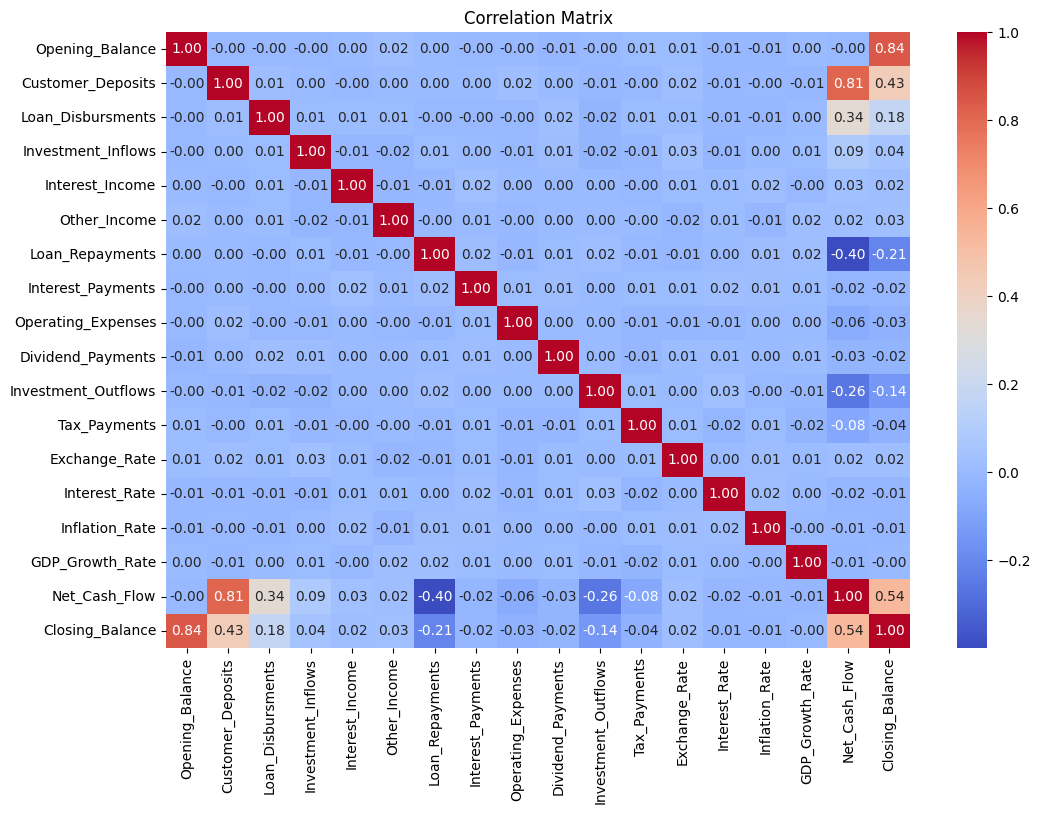

In [24]:
# Correlation Matrix excluding non-numeric columns
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

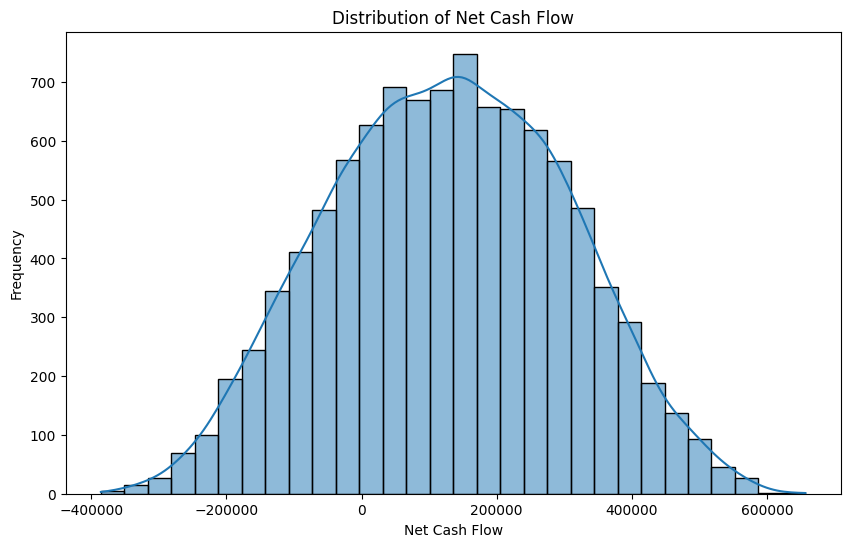

In [25]:
# Distribution of Net Cash Flow
plt.figure(figsize=(10, 6))
sns.histplot(df['Net_Cash_Flow'], kde=True, bins=30)
plt.title('Distribution of Net Cash Flow')
plt.xlabel('Net Cash Flow')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


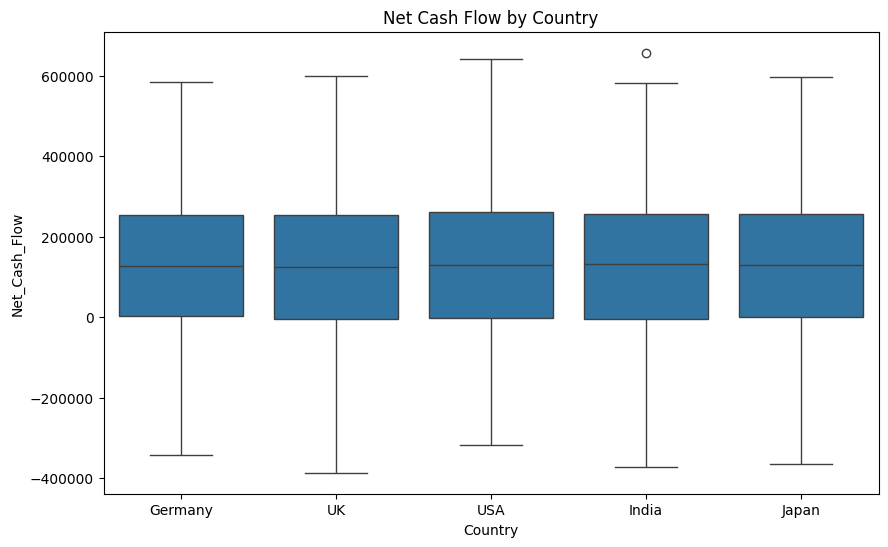

In [26]:
# Boxplot of Net Cash Flow by Country
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Net_Cash_Flow', data=df)
plt.title('Net Cash Flow by Country')
plt.show()

**Data Preparation**

In [27]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (there shouldn't be any in this generated data, but for completeness)
df.fillna(method='ffill', inplace=True)

# Detect and remove outliers using Interquartile Range (IQR)
Q1 = df['Net_Cash_Flow'].quantile(0.25)
Q3 = df['Net_Cash_Flow'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_cleaned = df[(df['Net_Cash_Flow'] >= lower_bound) & (df['Net_Cash_Flow'] <= upper_bound)]

# Show cleaned DataFrame
df_cleaned.head()


Date                   0
Opening_Balance        0
Customer_Deposits      0
Loan_Disbursments      0
Investment_Inflows     0
Interest_Income        0
Other_Income           0
Loan_Repayments        0
Interest_Payments      0
Operating_Expenses     0
Dividend_Payments      0
Investment_Outflows    0
Tax_Payments           0
Exchange_Rate          0
Interest_Rate          0
Inflation_Rate         0
GDP_Growth_Rate        0
Country                0
Currency               0
Net_Cash_Flow          0
Closing_Balance        0
dtype: int64


<ipython-input-27-837a98bde713>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Date,Opening_Balance,Customer_Deposits,Loan_Disbursments,Investment_Inflows,Interest_Income,Other_Income,Loan_Repayments,Interest_Payments,Operating_Expenses,...,Investment_Outflows,Tax_Payments,Exchange_Rate,Interest_Rate,Inflation_Rate,GDP_Growth_Rate,Country,Currency,Net_Cash_Flow,Closing_Balance
0,2022-01-01,659689.030554,407849.918020,81290.434760,44275.168168,6872.948946,6602.001879,174637.394219,6971.358422,21145.762862,...,95843.381302,16794.247682,1.300625,3.377711,1.590362,4.510899,Germany,EUR,221967.326419,8.816564e+05
1,2022-01-02,733150.964584,488026.896796,120699.804204,5703.070606,15645.104893,1439.681513,132477.263400,1185.727065,8043.775699,...,81827.900998,7547.182493,1.153831,4.972185,3.998447,-0.626219,UK,EUR,387324.765343,1.120476e+06
2,2022-01-03,109888.440376,102721.996822,173635.675052,49111.709706,16333.425028,1363.849534,79660.422369,6885.432468,13665.696605,...,147355.615726,36684.827260,0.997980,0.860243,5.078065,2.289749,USA,USD,44489.387278,1.543778e+05
3,2022-01-04,196411.889689,91334.948945,63088.008354,31306.128023,11111.305798,6498.178015,226395.188995,3246.789628,9619.809785,...,114447.652794,18389.031358,1.218961,3.963985,2.186283,4.848887,USA,JPY,-180283.486181,1.612840e+04
4,2022-01-05,87949.044172,173117.443181,179623.561486,22869.824751,9762.023966,6263.804660,211330.692549,3246.408361,20915.557332,...,125704.589754,17360.187859,1.084960,2.668419,4.266490,4.290309,India,EUR,5113.364498,9.306241e+04


**ML Modelling using Random Forest Regressor**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# Define features and target variable
X = df_cleaned.drop(columns=['Date', 'Net_Cash_Flow', 'Closing_Balance'])

# One-Hot Encoding for categorical variables (Country, Currency)
X_encoded = pd.get_dummies(X, columns=['Country', 'Currency'], drop_first=True)

# Define the target variable
y = df_cleaned['Net_Cash_Flow']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 21441.378636684465
Mean Squared Error: 711577374.7224001
Root Mean Squared Error: 26675.407676779752


**Model Validation**

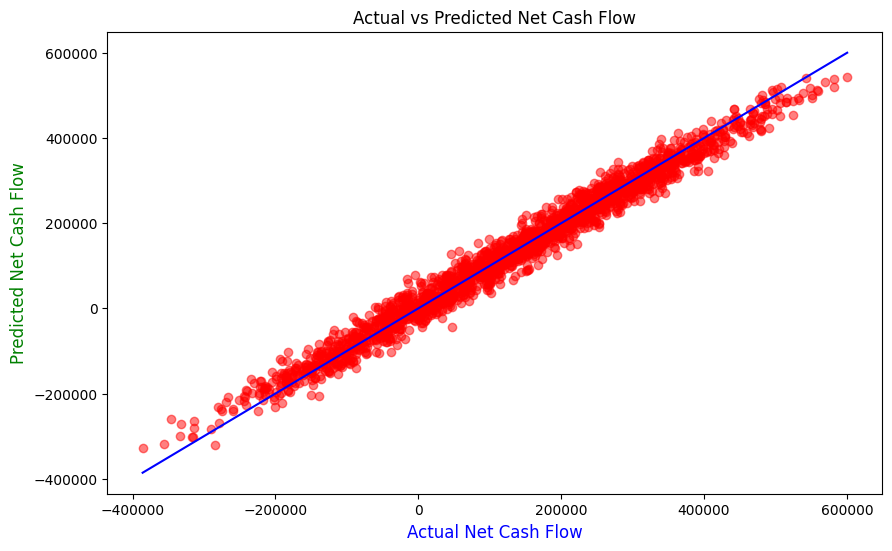

In [33]:
# Scatter plot of Actual vs Predicted Net Cash Flow
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='red', alpha=0.5, label='Predicted')

# Plot the diagonal line where Actual = Predicted (for visual reference)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', label='Actual = Predicted')

plt.xlabel('Actual Net Cash Flow', color='blue', fontsize=12)
plt.ylabel('Predicted Net Cash Flow', color='green', fontsize=12)
plt.title('Actual vs Predicted Net Cash Flow')
plt.show()



Feature importances length: 24
Feature names length: 24


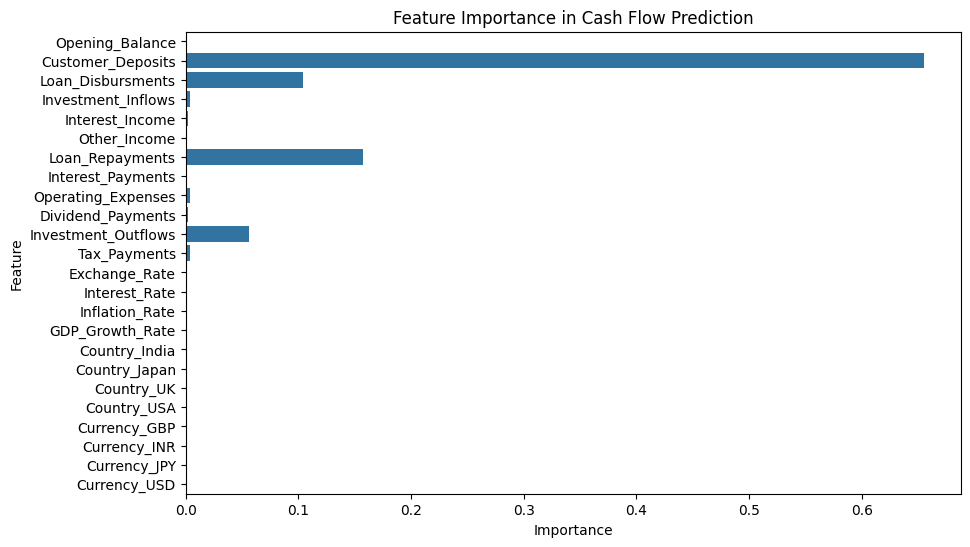

In [31]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get the feature names from the one-hot encoded DataFrame
feature_names = X_encoded.columns

# Check the length of feature_importances and feature_names to ensure they match
print(f"Feature importances length: {len(feature_importances)}")
print(f"Feature names length: {len(feature_names)}")

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importance in Cash Flow Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
